In [ ]:
!pip install PyDrive

In [2]:
# Uncomment the below code to access data files from Google Drive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

In [3]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [6]:
# downloaded = drive.CreateFile({'id':"19e6IBDbEeTly30ZjdURTPNVbUvSPxpDi"})   # replace the id with id of file you want to access
# downloaded.GetContentFile('train.csv') 
# downloaded = drive.CreateFile({'id':"1U9bLGTbb6zWo-NbcK7tP21WNn9ldZc0X"})   # replace the id with id of file you want to access
# downloaded.GetContentFile('test.csv') 

In [7]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt

from hyperopt import fmin, tpe, hp
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from keras.models import Model
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from sklearn.model_selection import KFold

In [8]:
# Load training data for exploratory tasks
train_data_exploration = pd.read_csv('train.csv')
print('Shape of the dataset: ' + str(train_data_exploration.shape) + '\n')
column_list = train_data_exploration.columns.to_list()
print('In-dependent Variables:')
for col in column_list[:-1]:
  print(col)

print('\nDependent Variable: ' + str(column_list[-1]))

Shape of the dataset: (3000, 23)

In-dependent Variables:
id
belongs_to_collection
budget
genres
homepage
imdb_id
original_language
original_title
overview
popularity
poster_path
production_companies
production_countries
release_date
runtime
spoken_languages
status
tagline
title
Keywords
cast
crew

Dependent Variable: revenue


In [9]:
# get all genres
train_data_exploration.loc[train_data_exploration.genres.isnull(), 'genres'] = "{}"
train_data_exploration['genres'] = train_data_exploration.genres.apply(lambda x: sorted([d['name'] for d in eval(x)])).apply(lambda x: ','.join(map(str, x)))
genres = train_data_exploration.genres.str.get_dummies(sep=',')

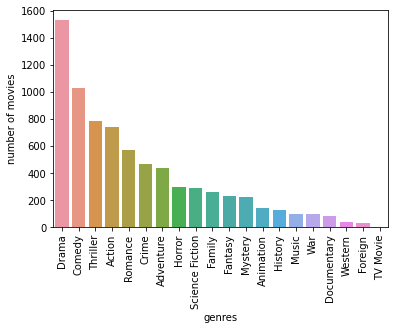

In [10]:
#Plot no. of movies against genres
movies_by_genre = pd.DataFrame(genres.sum(axis=0)).reset_index()
movies_by_genre.columns = ['genres', 'movies']
movies_by_genre = movies_by_genre.sort_values('movies', ascending=False)
fig = sns.barplot(x='genres', y='movies', data=movies_by_genre)
fig.set(ylabel='number of movies')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

In [11]:
# get all production companies
train_data_exploration.loc[train_data_exploration.production_companies.isnull(), 'production_companies'] = "{}"
train_data_exploration['production_companies'] = train_data_exploration.production_companies.apply(lambda x: sorted([d['name'] for d in eval(x)])).apply(lambda x: ','.join(map(str, x)))
production_companies = train_data_exploration.production_companies.str.get_dummies(sep=',')

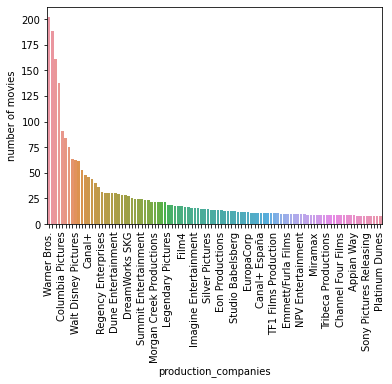

In [12]:
# plot no. of movies against production companies
movies_by_production_companies = pd.DataFrame(production_companies.sum(axis=0)).reset_index()
movies_by_production_companies.columns = ['production_companies', 'movies']
movies_by_production_companies = movies_by_production_companies.sort_values('movies', ascending=False).reset_index().loc[0:100]
fig = sns.barplot(x='production_companies', y='movies', data=movies_by_production_companies)
fig.set(ylabel='number of movies')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
for index, label in enumerate(fig.xaxis.get_ticklabels()):
    if index % 4 != 0:
        label.set_visible(False)

In [13]:
# get all production countries
train_data_exploration.loc[train_data_exploration.production_countries.isnull(), 'production_countries'] = "{}"
train_data_exploration['production_countries'] = train_data_exploration.production_countries.apply(lambda x: sorted([d['name'] for d in eval(x)])).apply(lambda x: ','.join(map(str, x)))
countries = train_data_exploration.production_countries.str.get_dummies(sep=',')

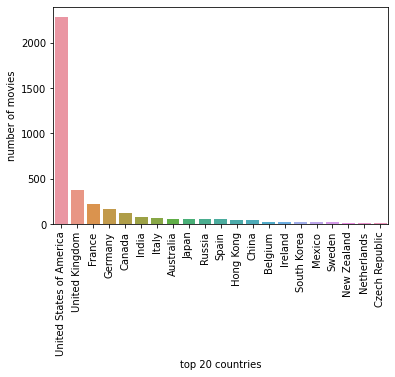

In [14]:
# Plot no. of movies against production countries
movies_by_countries = pd.DataFrame(countries.sum(axis=0)).reset_index()
movies_by_countries.columns = ['countries', 'movies']
top_20_countries = movies_by_countries.sort_values(by='movies', ascending=False).reset_index().loc[0:20]
fig = sns.barplot(x='countries', y='movies', data=top_20_countries)
fig.set(ylabel='number of movies', xlabel='top 20 countries')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

In [15]:
# Get spoken languages
train_data_exploration.loc[train_data_exploration.spoken_languages.isnull(), 'spoken_languages'] = "{}"
train_data_exploration['spoken_languages'] = train_data_exploration.spoken_languages.apply(lambda x: sorted([d['name'] for d in eval(x)])).apply(lambda x: ','.join(map(str, x)))
languages = train_data_exploration.spoken_languages.str.get_dummies(sep=',')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26222 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35805 missing from current font.
  font.set_

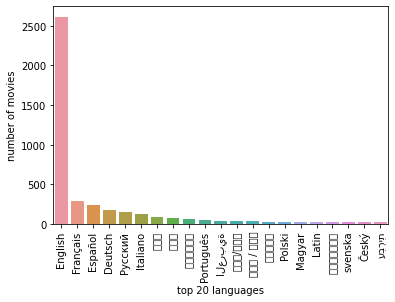

In [16]:
# Plot spoken languages against number of movies
movies_by_languages = pd.DataFrame(languages.sum(axis=0)).reset_index()
movies_by_languages.columns = ['language', 'movies']
top_20_languages = movies_by_languages.sort_values(by='movies', ascending=False).reset_index().loc[0:20]
fig = sns.barplot(x='language', y='movies', data=top_20_languages)
fig.set(ylabel='number of movies', xlabel='top 20 languages')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


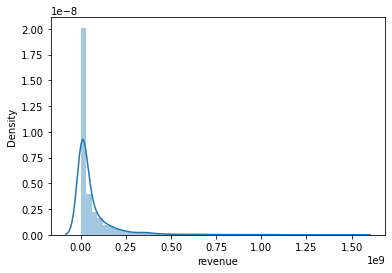

In [17]:
# Explore revenue distribution
sns.distplot(train_data_exploration.revenue)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


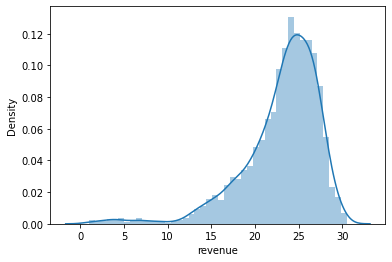

In [18]:
# Plot of log transformation on revenue
sns.distplot(np.log2(train_data_exploration.revenue + 1))

In [19]:
# Train-test data sets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'number of movies')]

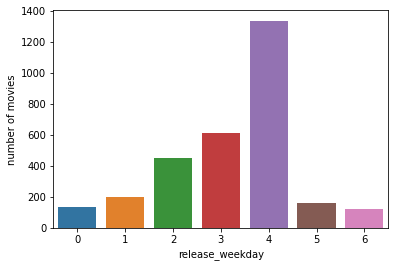

In [20]:
# Transformation of release_date
train_df.loc[train_df.release_date.isna(), 'release_date'] = '05/01/00'
train_df['release_date'] = pd.to_datetime(train_df['release_date'], format='%m/%d/%y')
train_df['release_year'] = train_df.release_date.dt.year
train_df['release_month'] = train_df.release_date.dt.month
train_df['release_day'] = train_df.release_date.dt.day
train_df['release_weekday'] = train_df.release_date.dt.weekday
train_df['release_quarter'] = train_df.release_date.dt.quarter
fig = sns.countplot(train_df.release_weekday)
fig.set(ylabel='number of movies')

In [21]:
# One-hot encoding for original language
# train_df['original_language']
original_language_count = train_df['original_language'].value_counts()
# original_language_count
for lang, count in original_language_count.loc[original_language_count > 10].iteritems():
    feature = 'original_language_' + lang
    train_df[feature] = 0
    train_df.loc[train_df.original_language == lang, feature] = 1

train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_weekday,release_quarter,original_language_en,original_language_fr,original_language_ru,original_language_es,original_language_hi,original_language_ja,original_language_it,original_language_ko,original_language_cn,original_language_zh,original_language_de,original_language_ta
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,20,4,1,1,0,0,0,0,0,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,6,4,3,1,0,0,0,0,0,0,0,0,0,0,0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,10,4,4,1,0,0,0,0,0,0,0,0,0,0,0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,9,4,1,0,0,0,0,1,0,0,0,0,0,0,0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2,5,3,1,0,0,0,0,0,0,0,1,0,0,0,0


In [22]:
# Removing the data points beyond a particular threshold as mentioned in the threshold dictionary
threshold = {'genres': 80, 'production_companies': 25, 'production_countries': 100, 'spoken_languages': 100}
for feature in ['genres', 'production_companies', 'production_countries', 'spoken_languages']:
    train_df.loc[train_df[feature].isnull(), feature] = '{}'
    train_df[feature] = train_df[feature].apply(lambda x: sorted([d['name'] for d in eval(x)]))
    train_df['num_of_' + feature] = train_df[feature].apply(lambda x: len(x))
    train_df[feature] = train_df[feature].apply(lambda x: ','.join(map(str, x)))
    
    tmp = train_df[feature].str.get_dummies(sep=',')
    tmp = tmp.loc[:, tmp.sum() > threshold[feature]]
    train_df = pd.concat([train_df, tmp], axis=1)

In [23]:
# Converting budget, collection, homepage and tagline into boolean attributes
train_df['has_budget'] = 1
train_df.loc[train_df.budget == 0, 'has_budget'] = 0
train_df['has_collection'] = 1
train_df.loc[train_df.belongs_to_collection.isnull(), 'has_collection'] = 0
train_df['has_homepage'] = 1
train_df.loc[train_df.homepage.isnull(), 'has_homepage'] = 0
train_df['has_tagline'] = 1
train_df.loc[train_df.tagline.isnull(), 'has_tagline'] = 0

In [24]:
# Calculating number of Keyword, cast and crew
for feature in ['Keywords', 'cast', 'crew']:
    train_df.loc[train_df[feature].isnull(), feature] = '{}'
    train_df['num_of_' + feature] = train_df[feature].apply(lambda x: len([d['name'] for d in eval(x)]))

In [25]:
# Normalization of numeric attributes
scaler = MinMaxScaler()
numeric_features = ['runtime', 'budget', 'popularity', 'release_year', 
                    'release_month', 'release_day', 'release_quarter', 
                    'num_of_Keywords', 'num_of_cast', 'num_of_crew']
for feature in numeric_features:
    if feature == 'budget':
        train_df.loc[train_df[feature] == 0, feature] = np.nanmedian(train_df[feature].loc[train_df[feature] != 0])
        train_df[feature] = np.log2(train_df[feature] + 1)
    train_df.loc[train_df[feature].isnull(), feature] = np.nanmedian(train_df[feature])
    train_df[feature] = scaler.fit_transform(train_df[feature].values.reshape(-1, 1))


In [26]:
# Dropping nominal attributes and transformed attributes
train_df = train_df.drop(['id', 'belongs_to_collection', 'genres', 'homepage', 'imdb_id', 
                        'original_language', 'original_title', 'overview', 'poster_path', 
                        'production_companies', 'production_countries', 'release_date', 
                        'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'], axis=1)

In [27]:
# Extracting numeric attributes for correlation matrix
processed_train_numeric = train_df.loc[:,['num_of_production_companies',
                                                 'num_of_production_countries', 'num_of_spoken_languages',
                                                 'num_of_Keywords', 'num_of_cast', 'num_of_crew', 'revenue']]

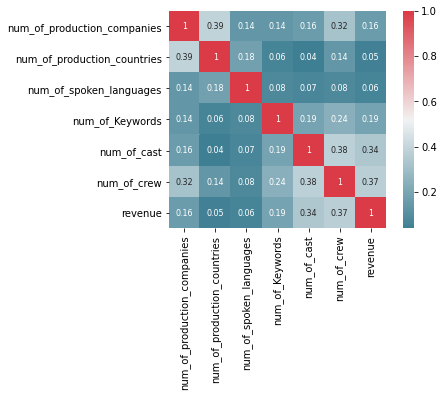

In [28]:
# Correlation matrix
corr = processed_train_numeric.corr().round(2)
sns.heatmap(corr, annot=True, annot_kws={"size": 8}, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [29]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:, :-1], train_df['revenue'], test_size = 0.3)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(X_train.head())
print(y_train.head())

2100
900
2100
900
        budget  popularity   runtime  ...  has_tagline  num_of_Keywords  num_of_cast
628   0.782379    0.026750  0.343195  ...            1         0.053691     0.179487
1494  0.746017    0.037009  0.257396  ...            1         0.080537     0.096154
368   0.833832    0.020618  0.289941  ...            1         0.013423     0.134615
2611  0.833832    0.056940  0.316568  ...            1         0.107383     0.185897
2083  0.833832    0.006636  0.301775  ...            1         0.000000     0.057692

[5 rows x 84 columns]
628      6174491
1494    11947954
368      3351735
2611    84431625
2083     3848034
Name: revenue, dtype: int64


In [30]:
# Log transformation for revenue
y_train = np.log(y_train + 1)
y_test = np.log(y_test + 1)
print(y_train.head())
print(y_test.head())

628     15.635937
1494    16.296071
368     15.024989
2611    18.251453
2083    15.163073
Name: revenue, dtype: float64
2346    17.729532
1395    16.985335
1259    12.945536
297     17.849566
735     17.887310
Name: revenue, dtype: float64


In [31]:
# RandomForestRegressor Hyperparameters
params = {'n_jobs': 4,
          'random_state': 0,
          'n_estimators': hp.choice('n_estimators', [100, 250, 500, 750, 1000]),
          'max_depth': hp.choice('max_depth', np.arange(3, 15, dtype=int)),
          'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2']),
          'min_samples_split': hp.uniform('min_samples_split', 0, 0.5),
          'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5)}

In [32]:
# K-fold CV for Random Forest Regressor
def KfoldCV(args): 
    
    rmlse_score = list()
    kf = KFold(n_splits=4)
    
    for train_index, test_index in kf.split(X_train):
        kf_X_train, kf_X_test = X_train.iloc[train_index], X_train.iloc[test_index]
        kf_y_train, kf_y_test = y_train.iloc[train_index], y_train.iloc[test_index]

        # print()
        
        model = RandomForestRegressor(**args)
        model.fit(kf_X_train, kf_y_train)        
        pred = model.predict(kf_X_test)
        pred[pred < 0] = 0        
        
        rmlse_score.append(np.sqrt(mean_squared_error(pred, kf_y_test)))
    
    print(rmlse_score)
    return np.mean(rmlse_score)

In [33]:
# Evaluations on K-fold CV to identify best set of hyperpaparmeter values
best = fmin(KfoldCV, params, algo=tpe.suggest, max_evals=10)
print("Best estimate parameters: ", best)


[3.0910306051043195, 3.0255303079472187, 3.111532163015131, 3.1904012150013097]
[1.4466352275873, 1.3393577436066861, 1.4948907713752377, 1.662620007602838]
[2.872076981068572, 2.7936402000582734, 2.890870716608839, 2.9807695188778167]
[3.091146262847292, 3.0255528264416913, 3.111484826439569, 3.1903350139847397]
[2.533843065803134, 2.4187120309528343, 2.541617207963156, 2.6471416327660213]
[2.3268518151894826, 2.2088537551081444, 2.368393457172669, 2.463909757336732]
[2.057077866819677, 1.9199545132539568, 2.1224206312902827, 2.2208673571951256]
[0.6607936798946111, 0.6994816289742618, 0.5577380909098125, 0.6681411339862476]
[3.091171987609634, 3.025608064124936, 3.1114681204318115, 3.1902871909047983]
[1.9835735855333974, 1.8497695296861383, 2.0228528908368033, 2.151625397450937]
100%|██████████| 10/10 [00:54<00:00,  5.50s/it, best loss: 0.6465386334412333]
Best estimate parameters:  {'max_depth': 11, 'max_features': 0, 'min_samples_leaf': 0.008155609880556358, 'min_samples_split': 0

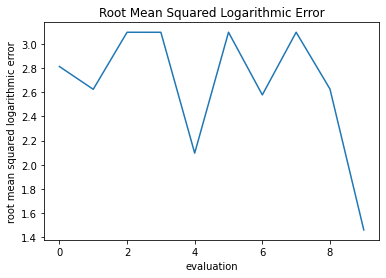

In [34]:
# Plot of RMSLE at each evaluation
eval_1 = np.mean([2.726126428311495, 2.8493543623273463, 3.0753944376532374, 2.5989560408207897])
eval_2 = np.mean([2.5403524331748937, 2.6634706395168632, 2.892442966467694, 2.399857711677484])
eval_3 = np.mean([3.0160123451429777, 3.1364112757498743, 3.339679527394077, 2.891654375947186])
eval_4 = np.mean([3.0160052674248186, 3.136745202462013, 3.3395901008148847, 2.890788681780844])
eval_5 = np.mean([2.018191785547467, 2.1464317015474386, 2.3852558024298682, 1.833874260981585])
eval_6 = np.mean([3.0160123451429777, 3.1364112757498743, 3.339679527394077, 2.891654375947186])
eval_7 = np.mean([2.466991415627268, 2.621634438234223, 2.8715070322056295, 2.3511547770201062])
eval_8 = np.mean([3.0160001060088333, 3.137087348994327, 3.339604917473268, 2.891742851105256])
eval_9 = np.mean([2.532582289956291, 2.6531208302018117, 2.9131118565819327, 2.4058688504709473])
eval_10 = np.mean([1.3755983558003972, 1.4247896570836838, 1.800238028080644, 1.241102006892476])
plt.plot([eval_1, eval_2, eval_3, eval_4, eval_5, eval_6, eval_7, eval_8, eval_9, eval_10])
plt.title('Root Mean Squared Logarithmic Error')
plt.ylabel('root mean squared logarithmic error')
plt.xlabel('evaluation')
plt.show()


In [35]:
# Prediction using Random Forest Regressor
regressor = RandomForestRegressor(max_depth=6, max_features='auto', min_samples_leaf=0.12172203620445682, min_samples_split=0.21613700859574192, n_estimators=1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred[y_pred < 0] = 0       
np.sqrt(mean_squared_error(y_pred, y_test))

1.4200572797677717

In [36]:
# Building and predicting using Linear Regression model
regressor = LinearRegression()
linear_regression = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred[y_pred < 0] = 0
rmsle = np.sqrt(mean_squared_error(y_pred, y_test))
print('RMSLE: ' + str(rmsle) + '\n')
print('Coefficients:')
print(linear_regression.coef_)
coef = linear_regression.coef_
print('Intercept:')
print(linear_regression.intercept_)
intercept = linear_regression.intercept_

RMSLE: 2.138749077438257

Coefficients:
[ 1.14841228e+01  8.48889210e-01  2.76535287e+00  3.34607608e-09
 -1.05100527e+00  1.29874871e-01  4.40443298e-01  5.65072974e-03
  2.87492126e-02 -3.06126415e-01 -7.99683446e-01  1.91358380e-01
  6.88647013e-01  6.86142383e-01  6.70482389e-01  8.36757719e-01
  1.89806658e+00  8.30424107e-01 -4.14025252e-01  4.08290263e-01
  1.69454434e+00 -8.50792480e-01  7.43397078e-01  1.10683228e+00
  1.04295539e+00  1.13233094e+00  9.60237285e-01 -1.07417056e-02
  6.88944251e-01  1.21083620e+00  8.17528491e-01  1.28988285e+00
  1.01842257e+00  9.15296081e-01  1.15203032e+00  1.09491007e+00
  7.27646533e-01  7.02681874e-01  1.33058106e+00  5.03966894e-02
  5.58662380e-01  4.95125634e-01 -1.19511037e-01  8.30860816e-01
  7.30303322e-01  5.10517656e-01  3.28517533e-01  1.08630887e+00
  1.11512201e+00  4.60773181e-01  7.87324730e-01  8.56666065e-01
  1.04138377e+00  5.54896794e-01  5.94815530e-01 -3.63310400e-01
  1.21268847e+00  1.35647057e-01  8.64775493e-01  

In [37]:
# Build Neural Network Model
def simple_model(input_shape):
    inp = Input(shape=(input_shape[1],))
    x = Dense(64, activation='sigmoid')(inp)
    x = Dense(32, activation='sigmoid')(x)
    x = Dense(16, activation='sigmoid')(x)
    x = Dense(1)(x)
    
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.005), metrics=['mean_squared_error'])
    return model

In [38]:
# Perform K-FOld CV on Neural Network Model
random_seed = 2019
k = 5
fold = list(KFold(k, shuffle = True, random_state = random_seed).split(X_train))
np.random.seed(random_seed)
best_models = []

for i, (trn, val) in enumerate(fold) :
  kf = KFold(n_splits=5)
  best_model = None
  best_score = None
      
  for train_index, test_index in kf.split(X_train):
      kf_X_train, kf_X_test = X_train.iloc[train_index], X_train.iloc[test_index]
      kf_y_train, kf_y_test = y_train.iloc[train_index], y_train.iloc[test_index]

      # print(i+1, "fold.    RMSE")
      fold_val_pred = []
      fold_test_pred = []
      fold_err = []
      
      model = simple_model(kf_X_train.shape)
      model_fit = model.fit(kf_X_train, kf_y_train, epochs=50, validation_data=(kf_X_test, kf_y_test), verbose=1)
      score = mean_squared_error(kf_y_test, model.predict(kf_X_test))
      print((model, score))
      if best_model is None:
        best_model = model_fit
        best_score = score
      elif score < best_score:
        best_score = score
        best_model = model_fit
      best_models.append((model, score))

Epoch 1/50
53/53 [==============================] - 0s 6ms/step - loss: 174.2359 - mean_squared_error: 174.2359 - val_loss: 125.2242 - val_mean_squared_error: 125.2242
Epoch 2/50
53/53 [==============================] - 0s 2ms/step - loss: 103.3001 - mean_squared_error: 103.3001 - val_loss: 76.1810 - val_mean_squared_error: 76.1810
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 57.2009 - mean_squared_error: 57.2009 - val_loss: 39.9070 - val_mean_squared_error: 39.9070
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 30.8580 - mean_squared_error: 30.8580 - val_loss: 22.5948 - val_mean_squared_error: 22.5948
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 18.5445 - mean_squared_error: 18.5445 - val_loss: 14.7302 - val_mean_squared_error: 14.7302
Epoch 6/50
53/53 [==============================] - 0s 2ms/step - loss: 12.9466 - mean_squared_error: 12.9466 - val_loss: 11.4511 - val_mean_squared_error: 11.4511
Epoch 7/50

[172.92312622070312, 95.48734283447266, 52.8738899230957, 27.860597610473633, 16.75760841369629, 12.230435371398926, 10.560025215148926, 10.032629013061523, 9.884228706359863, 9.834735870361328, 9.814910888671875, 9.772252082824707, 9.694181442260742, 9.840744972229004, 9.879255294799805, 9.848241806030273, 9.844292640686035, 9.839484214782715, 9.835477828979492, 9.8387451171875, 9.841712951660156, 9.84329891204834, 9.853731155395508, 9.839433670043945, 9.837080001831055, 9.840862274169922, 9.833771705627441, 9.840574264526367, 9.842771530151367, 9.84598445892334, 9.841715812683105, 9.838065147399902, 9.839609146118164, 9.841745376586914, 9.852094650268555, 9.834526062011719, 9.846786499023438, 9.842371940612793, 9.846814155578613, 9.838711738586426, 9.840432167053223, 9.832647323608398, 9.841327667236328, 9.839324951171875, 9.840481758117676, 9.849695205688477, 9.846159934997559, 9.845909118652344, 9.847987174987793, 9.852458953857422]
[172.92312622070312, 95.48734283447266, 52.873889

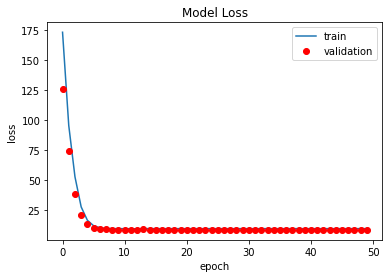

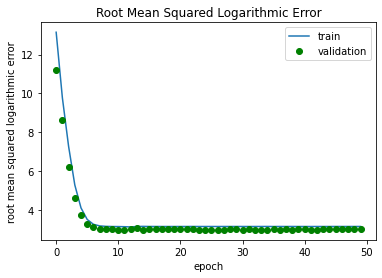

In [39]:
# Best Model and MSLE and loss plot for neural network
print(best_model)
print(best_model.history['loss'])
print(best_model.history['mean_squared_error'])
print(best_model.history['val_loss'])
print(best_model.history['val_mean_squared_error'])

plt.plot(best_model.history['loss'])
plt.plot(best_model.history['val_loss'], 'ro')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(np.sqrt(best_model.history['mean_squared_error']))
plt.plot(np.sqrt(best_model.history['val_mean_squared_error']), 'go')
plt.title('Root Mean Squared Logarithmic Error')
plt.ylabel('root mean squared logarithmic error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [40]:
# Using all the models to predict on test data and calculating RMSLE
y_preds = []
for mod, score in best_models:
    y_preds.append(mod.predict(X_test))
y_preds = np.mean(y_preds, axis=0)
print(np.sqrt(mean_squared_error(y_test, y_preds)))

2.9551796644120873
